# Applied Naive Bayes and Logistic Regression

In [55]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [4]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df.shape

(5572, 2)

In [10]:
wordcloud = WordCloud(background_color='white',width=800,height=400).generate(''.join(df.v2))

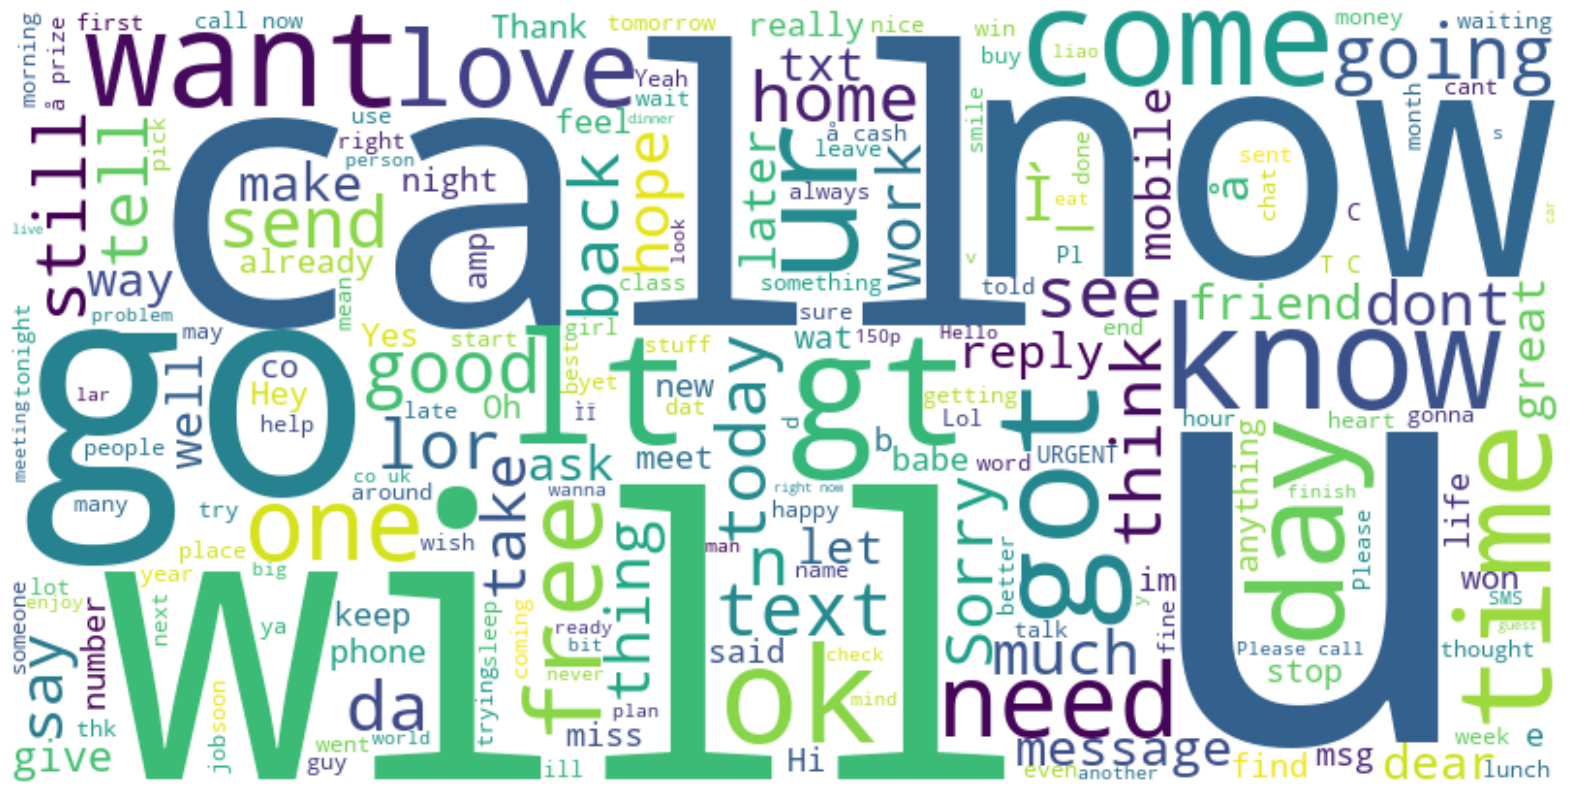

In [11]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

<Axes: xlabel='v1', ylabel='count'>

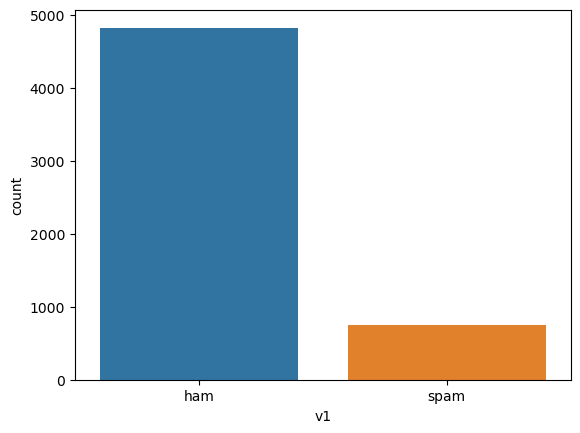

In [15]:
sns.countplot(x = df['v1'] , data = df)

In [16]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

### Transform the values of the output variable into 0 and 1.

In [18]:
df['v1'] = df['v1'].map({'spam': 1 , 'ham' : 0})

In [19]:
df.sample(4)

,v1,v2
4016,0,Eek that's a lot of time especially since Amer...
1082,0,Send to someone else :-)
1086,0,I don't think he has spatula hands!
3102,0,"U so lousy, run already come back then half de..."


In [20]:
from sklearn.utils import resample

In [21]:
# create two different dataframe of majority and minority class 

df_majority = df[(df['v1'] == 0)]
df_minority = df[(df['v1'] == 1)]

df_minority_unsampled = resample(df_minority, replace=True,n_samples=4825 , random_state=42)

df_unsampled = pd.concat([df_minority,df_minority_unsampled])

In [22]:
df_unsampled.shape

(5572, 2)

In [25]:
df_unsampled.isnull().sum()

v1    0
v2    0
dtype: int64

### Converting text data into vectors.
Machine learning models don't understand textual data. So we have to convert it into numerical form. There are many methods for doing this. For instance, Bag of words, TF-IDF, One-Hot encoding, Word Embedding, etc. We will use a bag of words because it is very intuitive.

### Bag of words:
In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.

In [31]:
text = ['Hello my name is james', 'james this is my python notebook', 'james trying to create a big dataset', 'james of words to try differnt', 'features of count vectorizer']
vectorizer = CountVectorizer(stop_words='english')
count_matrix = vectorizer.fit_transform(text)

count_array = count_matrix.toarray()

df1 = pd.DataFrame(data = count_array,columns = vectorizer.get_feature_names_out())

df1.shape

(5, 14)

## Converting email texts into vectors.

In [32]:
X = vectorizer.fit_transform(df["v2"])

y = df["v1"]

In [35]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.3, random_state=0)

## Applying Naive Bayes

In [37]:
clf = GaussianNB()

In [38]:
clf.fit(X_train, y_train)

GaussianNB()

In [39]:
clf.score(X_test, y_test)

0.8833732057416268

In [41]:
y_pred_class = clf.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred_class)

0.8833732057416268

In [45]:
cf_matrix = confusion_matrix(y_test, y_pred_class)

<Axes: >

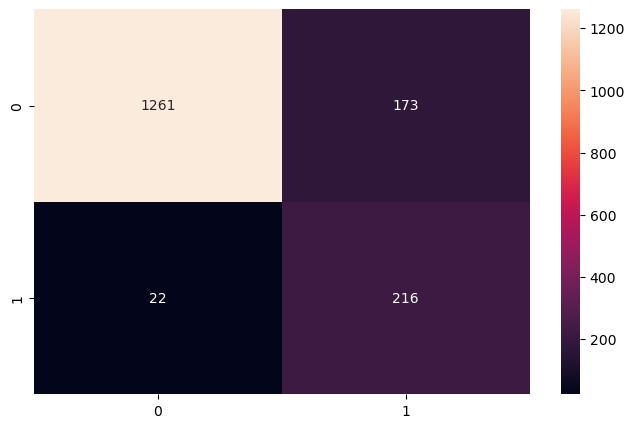

In [46]:
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True, fmt='d')

## Applying Logistic Regression

In [48]:
log_reg = LogisticRegression()

In [49]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred_class = log_reg.predict(X_test)

In [52]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.00221923, 0.01599355, 0.04610985, ..., 0.02277052, 0.00161194,
       0.0062625 ])

In [53]:
accuracy_score(y_test, y_pred_class)

0.9784688995215312

In [56]:
roc_auc_score(y_test, y_pred_prob)

0.9934718657337411